# FetchMaker

Congratulations! You’ve just started working at the hottest new tech startup, FetchMaker. FetchMaker’s mission is to match up prospective dog owners with their perfect pet. FetchMaker has been collecting data on their adoptable dogs, and it’s your job to analyze some of that data.

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data to the Rescue 

In [52]:
dogs = pd.read_csv('dog_data.csv')
dogs.head()

,is_rescue,weight,tail_length,age,color,likes_children,is_hypoallergenic,name,breed
0,0,6,2.25,2,black,1,0,Huey,chihuahua
1,0,4,5.36,4,black,0,0,Cherish,chihuahua
2,0,7,3.63,3,black,0,1,Becka,chihuahua
3,0,5,0.19,2,black,0,0,Addie,chihuahua
4,0,5,0.37,1,black,1,1,Beverlee,chihuahua


- weight, an integer representing how heavy a dog is in pounds
- tail_length, a float representing tail length in inches
- age, in years
- color, a String such as "brown" or "grey"
- is_rescue, a boolean 0 or 1

In [53]:
dogs.dtypes

is_rescue              int64
weight                 int64
tail_length          float64
age                    int64
color                 object
likes_children         int64
is_hypoallergenic      int64
name                  object
breed                 object
dtype: object

In [54]:
len(dogs)

800

In [55]:
dogs['breed'].value_counts()

shihtzu       100
pitbull       100
terrier       100
chihuahua     100
poodle        100
whippet       100
rottweiler    100
greyhound     100
Name: breed, dtype: int64

FetchMaker estimates (based on historical data for all dogs) that 8% of dogs in their system are rescues.

They would like to know if whippets are significantly more or less likely than other dogs to be a rescue.

In [56]:
whippet_rescue = dogs.is_rescue[dogs['breed'] == 'whippet']

How many whippets are rescues?

In [57]:
num_whippet_rescues = np.sum(whippet_rescue == 1)
num_whippet_rescues

6

In [58]:
num_whippet = len(whippet_rescue)
num_whippet

100

In [59]:
np.mean(whippet_rescue)

0.06

Use a hypothesis test to test the following null and alternative hypotheses:
- Null: 8% of whippets are rescues
- Alternative: more or less than 8% of whippets are rescues

Save the p-value from this test as pval and print it out. Using a significance threshold of 0.05, Is the proportion of whippets who are rescues significantly different from 8%?

In [60]:
# binom (binary categorical variable, between rescue or not rescue)
from scipy.stats import binom_test

pval = binom_test(num_whippet_rescues, num_whippet, .08)
pval

0.5811780106238098

### Mid-Sized Dog Weights 

Three of FetchMaker’s most popular mid-sized dog breeds are 'whippet's, 'terrier's, and 'pitbull's. Is there a significant difference in the average weights of these three dog breeds?

In [61]:
wt_whippets = dogs.weight[dogs['breed'] == 'whippet']
wt_terriers = dogs.weight[dogs['breed'] == 'terrier']
wt_pitbulls = dogs.weight[dogs['breed'] == 'pitbull']

Run a single hypothesis test to address the following null and alternative hypotheses:
- Null: whippets, terriers, and pitbulls all weigh the same amount on average
- Alternative: whippets, terriers, and pitbulls do not all weigh the same amount on average (at least one pair of breeds has differing average weights)

Save the resulting p-value as pval and print it out. Using a significance threshold of 0.05, is there at least one pair of dog breeds that have significantly different average weights?

In [62]:
# Anova test 
#(association between 2 variables, a non binary categorical (breed with 3 possible options), a quantitative var (weight))

from scipy.stats import f_oneway

stat, pval = f_oneway(wt_whippets, wt_terriers, wt_pitbulls)
pval

3.276415588274815e-17

(p-value (0.0000000000000000327) is much smaller than 0.05, we 'reject the null' conclude there is significant different weight between whippets, terriers and pitbulls.)

Run another hypothesis test to determine which of those breeds (whippets, terriers, and pitbulls) weigh different amounts on average. Use an overall type I error rate of 0.05 for all three comparisons.

In [63]:
# subsets to just whippet, terrier and pitbulls

dogs_wtp = dogs[dogs['breed'].isin(['whippet', 'terrier', 'pitbull'])]
dogs_wtp.head(2)

,is_rescue,weight,tail_length,age,color,likes_children,is_hypoallergenic,name,breed
200,0,71,5.74,4,black,0,0,Charlot,pitbull
201,0,26,11.56,3,black,0,0,Jud,pitbull


In [64]:
# tukey test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(dogs_wtp['weight'], dogs_wtp['breed'], .05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
pitbull,terrier,-13.24,0.001,-16.728,-9.752,True
pitbull,whippet,-3.34,0.0639,-6.828,0.148,False
terrier,whippet,9.9,0.001,6.412,13.388,True


### Poodle and Shihtzu Colors 

FetchMaker wants to know if 'poodle's and 'shihtzu's come in different colors.

In [65]:
dogs_ps = dogs[dogs['breed'].isin(['poodle', 'shihtzu'])]
dogs_ps.head(2)

,is_rescue,weight,tail_length,age,color,likes_children,is_hypoallergenic,name,breed
300,0,58,8.05,1,black,1,0,Moise,poodle
301,0,56,9.44,4,black,1,0,Boote,poodle


In [66]:
xtab = pd.crosstab(dogs_ps['breed'], dogs_ps['color'])
xtab

color,black,brown,gold,grey,white
breed,,,,,
poodle,17,13,8,52,10
shihtzu,10,36,6,41,7


Run a hypothesis test for the following null and alternative hypotheses:
- Null: There is an association between breed (poodle vs. shihtzu) and color.
- Alternative: There is not an association between breed (poodle vs. shihtzu) and color

Save the p-value as pval and print it out. Do poodles and shihtzus come in significantly different color combinations? Use a significance threshold of 0.05.

In [67]:
# chi square test

from scipy.stats import chi2_contingency

chi2, pval, dof, expected = chi2_contingency(xtab)
pval

0.005302408293244597

(p-value (0.005) is less than 0.05. we 'reject the null' conclude there is significant association different between breed (poodle vs shitzu) and color.)

### Good learner! Have a treat! 

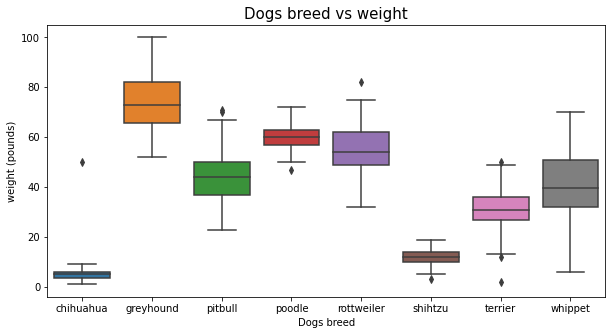

<Figure size 432x288 with 0 Axes>

In [69]:
plt.figure(figsize=(10,5))

sns.boxplot(x=dogs['breed'], y=dogs['weight'])
plt.xlabel('Dogs breed')
plt.ylabel('weight (pounds)')
plt.title('Dogs breed vs weight', fontsize=15)
plt.show()
plt.clf()

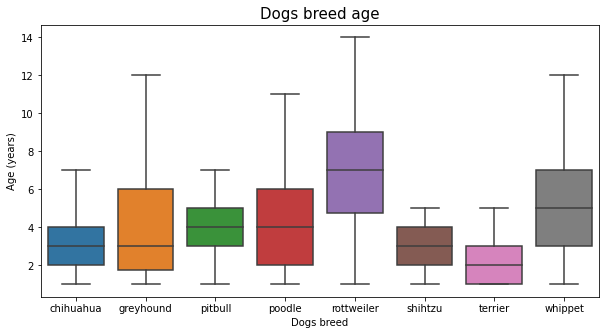

<Figure size 432x288 with 0 Axes>

In [71]:
plt.figure(figsize=(10,5))

sns.boxplot(x=dogs['breed'], y=dogs['age'])
plt.xlabel('Dogs breed')
plt.ylabel('Age (years)')
plt.title('Dogs breed age', fontsize=15)
plt.show()
plt.clf()